In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pymongo import MongoClient
from geopy.geocoders import Nominatim

locate = Nominatim()
client = MongoClient()
db = client.twitterCleanDb
tweetCollection = db.tenKtweetsCleaned

times = []
polarities = []
subjectivities = []
locations = []
locationPolarities = []
lats = []
longs = []
modiTweets = tweetCollection.find({'cleantest' :{'$regex': '.*a*.'}})
for tweet in modiTweets:
    times.append(tweet['created_at'])
    polarities.append(tweet['polarity'])
    subjectivities.append(tweet['subjectivity'])
    
    latlong = locate.geocode(tweet['user']['location'], timeout = 10)
    if latlong is None:
        latlong = locate.geocode(tweet['user']['time_zone'], timeout = 10)
        if latlong is None:
            print('appended')
        else:
            locations.append([latlong.latitude, latlong.longitude])
            print('appended 1', latlong, latlong.latitude, latlong.longitude)
            locationPolarities.append(tweet['polarity'])
    else:
        locations.append([latlong.latitude, latlong.longitude])
        print('appended 2', latlong, latlong.latitude, latlong.longitude)
        locationPolarities.append(tweet['polarity'])
    

appended 2 Nederland 52.2379891 5.53460738161551
appended 2 Harris County, Texas, 77449, United States of America 29.8207822747903 -95.7366129151
appended 2 Tarpon Springs, Pinellas County, Florida, 34689, United States of America 28.1477885 -82.7774086726313
appended 1 None, TO, PIE, Italia 44.933143 7.540121
appended 2 London, Greater London, England, SW1A 2DU, UK 51.5073219 -0.1276474
appended 2 Mabunda, Município de Luanda, Luanda, 64346, Angola -8.8483112 13.2076618
appended 2 Santa Marta, Magdalena, Colombia 11.0869172 -73.8806606343634
appended 2 Kalamazoo, Kalamazoo County, Michigan, United States of America 42.291707 -85.5872286
appended 1 None, TO, PIE, Italia 44.933143 7.540121
appended 2 United States of America 39.7837304 -100.4458825
appended 2 नेपाल 28.1083929 84.0917139
appended 2 Nigeria 9.6000359 7.9999721
appended 1 None, TO, PIE, Italia 44.933143 7.540121
appended 1 None, TO, PIE, Italia 44.933143 7.540121
appended 1 London, Greater London, England, SW1A 2DU, UK 51.

appended 2 Boston, Suffolk County, Massachusetts, United States of America 42.3604823 -71.0595678
appended
appended 1 None, TO, PIE, Italia 44.933143 7.540121
appended
appended 1 None, TO, PIE, Italia 44.933143 7.540121
appended 1 None, TO, PIE, Italia 44.933143 7.540121
appended 2 Washington, District of Columbia, United States of America 38.8949549 -77.0366456
appended 1 None, TO, PIE, Italia 44.933143 7.540121
appended 2 Englewood, Chicago, Cook County, Illinois, 60636, United States of America 41.7797559 -87.6458836
appended
appended 2 Canada 61.0666922 -107.9917071
appended 2 Lowndes County, Georgia, United States of America 30.8195619 -83.2628255
appended 1 กรุงเทพมหานคร, ประเทศไทย 13.7538929 100.8160803
appended 1 None, TO, PIE, Italia 44.933143 7.540121
appended 1 None, TO, PIE, Italia 44.933143 7.540121
appended 2 Miami Drive, Tallahassee, Leon County, Florida, 32311, United States of America 30.429583 -84.217732
appended
appended 2 London, Greater London, England, SW1A 2DU, U

GeocoderTimedOut: Service timed out

In [3]:
import dateutil
df = pd.DataFrame({'time':times, 'polarity': polarities, 'subjectivity': subjectivities})
df = df.sort_values(by=['time'])
df['time'] = df['time'].apply(dateutil.parser.parse)
df.dtypes

polarity                    float64
subjectivity                float64
time            datetime64[ns, UTC]
dtype: object

Text(0,0.5,'Sentiment Value')

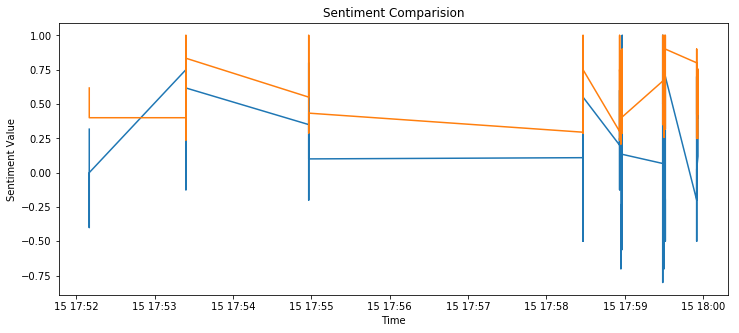

In [4]:
plt.figure(figsize = (12, 5))

plt.title('Sentiment Comparision')
plt.plot(df['time'], df['polarity'])
plt.plot(df['time'], df['subjectivity'])

plt.xlabel('Time')
plt.ylabel('Sentiment Value')



In [5]:
lats = [lat[0] for lat in locations]
longi = [long[1] for long in locations]

print(lats, " +  ", longi)

[52.2379891, 29.8207822747903, 28.1477885, 44.933143, 51.5073219, -8.8483112, 11.0869172, 42.291707, 44.933143, 39.7837304, 28.1083929, 9.6000359, 44.933143, 44.933143, 51.5073219, 46.3239455, 44.933143, 44.933143, 39.4124481, 44.2222023, 44.2222023, 39.5162234, 44.933143, 44.7716333, 56.0441984, 44.933143, 44.933143, 39.7837304, 9.80067315, 38.9786401, 43.2961743, 39.523652, 30.4380832, 44.933143, 39.1852184, 3.1546872, 44.933143, 30.2240897, 44.933143, 9.624388, 37.6413209, 44.933143, 52.2928116, 44.933143, -28.5912315, 44.933143, 37.5666791, 43.6211955, 47.6041834, 16.3471243, 44.933143, -28.1652832, 41.5510583, 35.9131542, 25.7742658, 44.933143, 40.0428151, 44.933143, 27.8002542, 43.0116784, 44.933143, 44.933143, -29.9476433, 55.856656, 51.0834196, 53.4791301, 44.933143, 44.933143, 44.933143, 34.851354, -26.8303703, 44.4308975, 40.7306458, 44.933143, 8.0300284, 44.933143, 44.933143, 27.77330515, 31.8111305, 44.933143, 30.3308401, 35.7212689, 52.7954791, -31.9513659, 34.395342, 6.91

In [6]:
lats = list(filter(lambda a: a != 'p', lats))


In [7]:
import mplleaflet

mapdf = pd.DataFrame({'lat': lats, 'longi': longi, 'polarity':polarities[:len(lats)]})
plt.figure(figsize=(8, 8))
plt.scatter(longi, lats, c = polarities[:len(lats)])
mplleaflet.display()